## l. Introduction

### 1. Identify a domain specific area:

Bio-informatics - 
Healthcare and Medicine, specifically diabetes

### 2. Dataset:

TEMPORARY TOY DATASET: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

sklearn.datasets (datasets.load_diabetes())


## ========================================
### use this dataset for real submission:
### https://www.kaggle.com/code/adamhertelendi/diabetes-ds-data-analysis

### 3. Objectives of the Project

Diabetes is responsible for {insert number here} deaths every year. There are markers that can be distinguished that can be used to determine the likelihood of diabetes developing 

## ll. Implementation

### 4. Convert / store dataset locally and preprocess the data

In [1]:
from sklearn import datasets

In [13]:
# load diabetes dataset from the sklearn dataset library
diabetes = datasets.load_diabetes()

# check type of dataset
print(type(diabetes))

<class 'sklearn.utils.Bunch'>


In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

##### The first 10 columns are numeric descriptive values, and the 11th column is the 'y' variable that will be predicted

In [6]:
# print out the columns
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [7]:
# assign the x and y variables
x = diabetes.data
y = diabetes.target

In [11]:
# check the rows and columns of x and y
x.shape, y.shape

((442, 10), (442,))

#### Identify key series of the dataset and provide statistical summary of the data, including:
 - measures of central tendency
 - measures of spread
 - type of distribution

##### Import module necessary for data split

In [14]:
from sklearn.model_selection import train_test_split

In [25]:
# initialise data into an 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [26]:
x_train.shape, y_train.shape

((353, 10), (353,))

In [27]:
x_test.shape, y_test.shape

((89, 10), (89,))

##### Import modules necessary for creating the regression model

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

Define the regression model

In [30]:
model = linear_model.LinearRegression()

Build the training model

In [31]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Use the trained model to make predicions on the test set

In [32]:
y_pred = model.predict(x_test)

#### Create dictionary of dependent variables and their respective coefficients

In [56]:
# initiate dictionary
coeff_dict = {}

# assign the variables and respective coefficient values
for i, coeff in enumerate(model.coef_):
    coeff_dict[diabetes.feature_names[i]] = coeff


In [57]:
coeff_dict

{'age': -5.553229707287754,
 'sex': -272.603425451895,
 'bmi': 568.5898783527225,
 'bp': 321.8981842125007,
 's1': -495.9208158106599,
 's2': 229.91778806747158,
 's3': -36.211586699922094,
 's4': 115.14349453528206,
 's5': 692.8391512384989,
 's6': 10.577732645385591}

##### Print out the model performance

In [62]:
print(f"Intercept: {model.intercept_}\n")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}\n")
print(f"Coefficient of determination (R^2): {r2_score(y_test, y_pred)}\n")
print(f"Coefficients: {coeff_dict}")

Intercept: 152.068188616067

Mean Squared Error: 2978.490792556882

Coefficient of determination (R^2): 0.3760946398545989

Coefficients: {'age': -5.553229707287754, 'sex': -272.603425451895, 'bmi': 568.5898783527225, 'bp': 321.8981842125007, 's1': -495.9208158106599, 's2': 229.91778806747158, 's3': -36.211586699922094, 's4': 115.14349453528206, 's5': 692.8391512384989, 's6': 10.577732645385591}


#### Import module for creating plot

In [63]:
import seaborn as sns

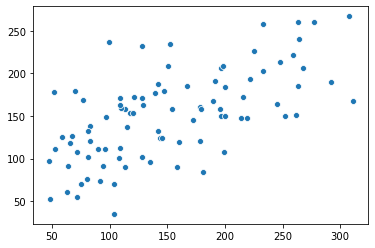

In [64]:
sns.scatterplot(y_test, y_pred)